In [47]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
import numpy as np

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [4]:
import matplotlib.pyplot as plt

In [ ]:
def plot_digit(image, ax=None):
    if ax is None:
        ax = plt.gca()  
    ax.imshow(image.reshape(28, 28), cmap="binary")
    ax.axis('off')

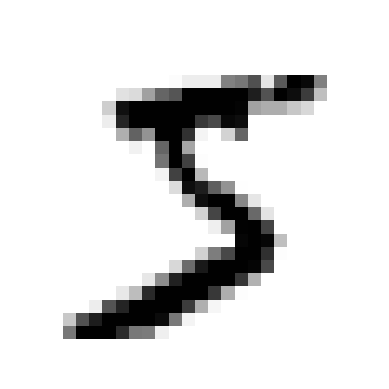

In [13]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [9]:
y[0]

'5'

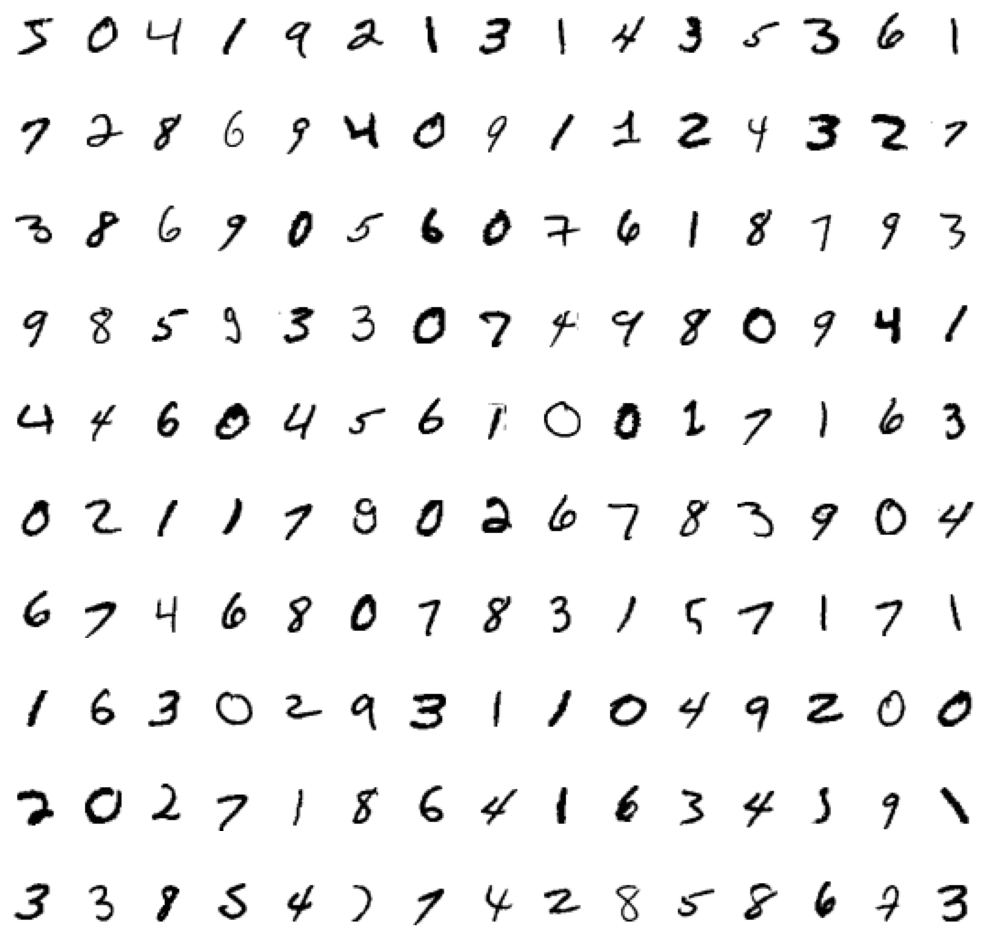

In [50]:
fig, axes = plt.subplots(10,15, figsize=(10,10))
axes = axes.flatten()

for i in range(150):
    ax = axes[i]
    plot_digit(X[i],ax=ax)
plt.tight_layout()
plt.show()

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')


In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [27]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [28]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [29]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

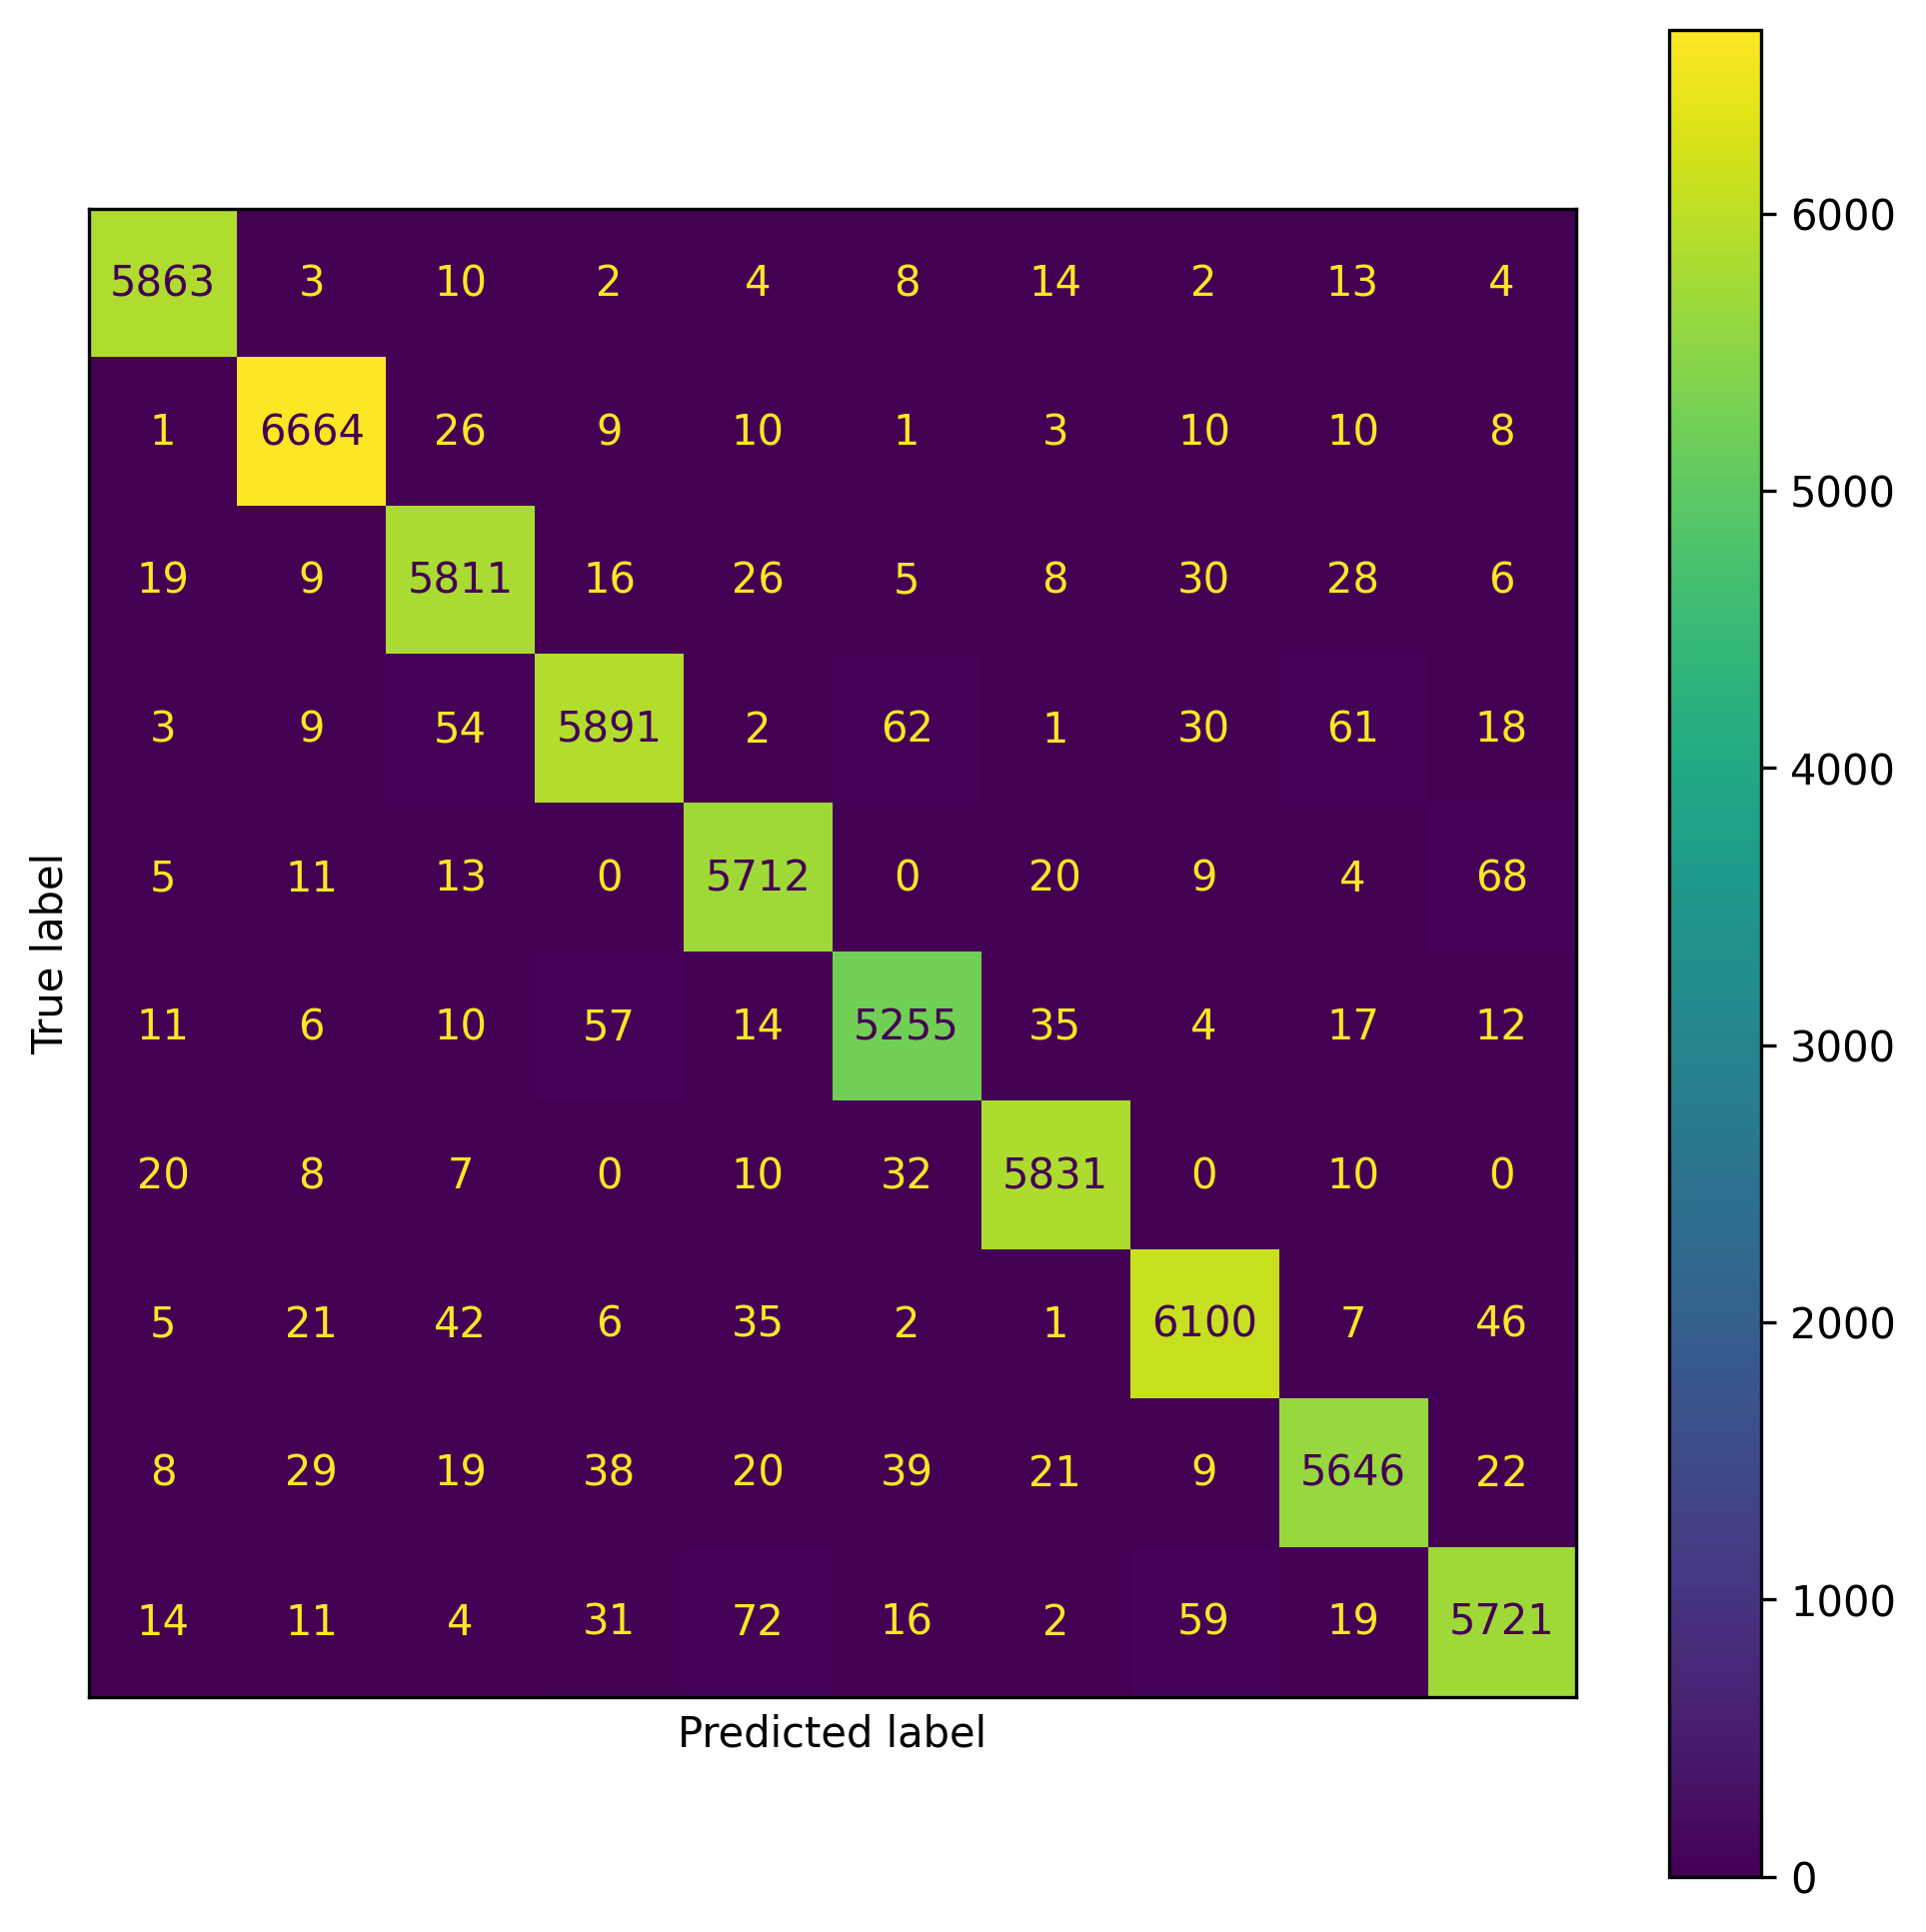

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8,8), dpi=300)
#y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,ax=ax)
ax.set_xticks([])  
ax.set_yticks([])  
plt.show()

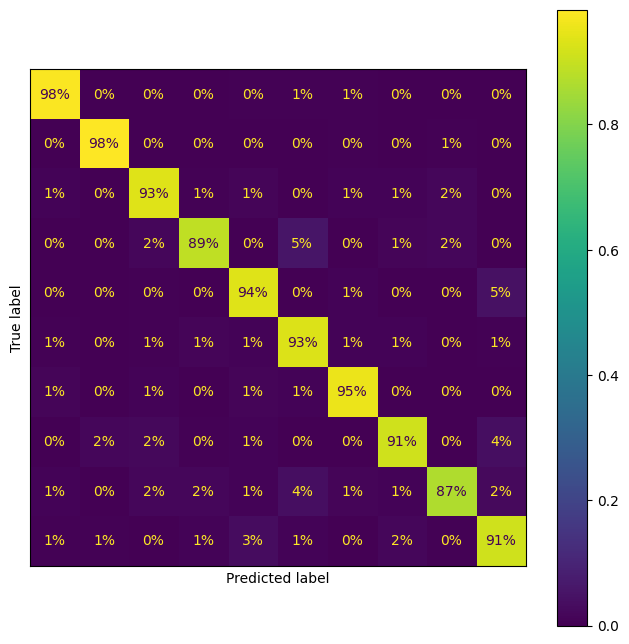

In [46]:

fig, ax = plt.subplots(figsize=(8,8))
#y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_test, svm_clf.predict(X_test), normalize='true', values_format=".0%",ax=ax,cmap='viridis')
ax.set_xticks([])  
ax.set_yticks([])  
plt.show()

In [48]:
np.random.seed(42)

noise = np.random.randint(0,100,X_train.shape)

X_train_noised = X_train + noise

noise = np.random.randint(0,100,X_test.shape)

X_test_noised = X_test + noise

y_train_noised = X_train
y_test_noised = X_test


In [57]:
def draw_mnist(length=10, width=10, data=None):
    fig, axes = plt.subplots(length,width, figsize=(10,10), dpi=300)
    axes = axes.flatten()
    for i in range(len(axes)):
        ax = axes[i]
        plot_digit(data[i],ax=ax)
    plt.tight_layout()
    plt.show()  

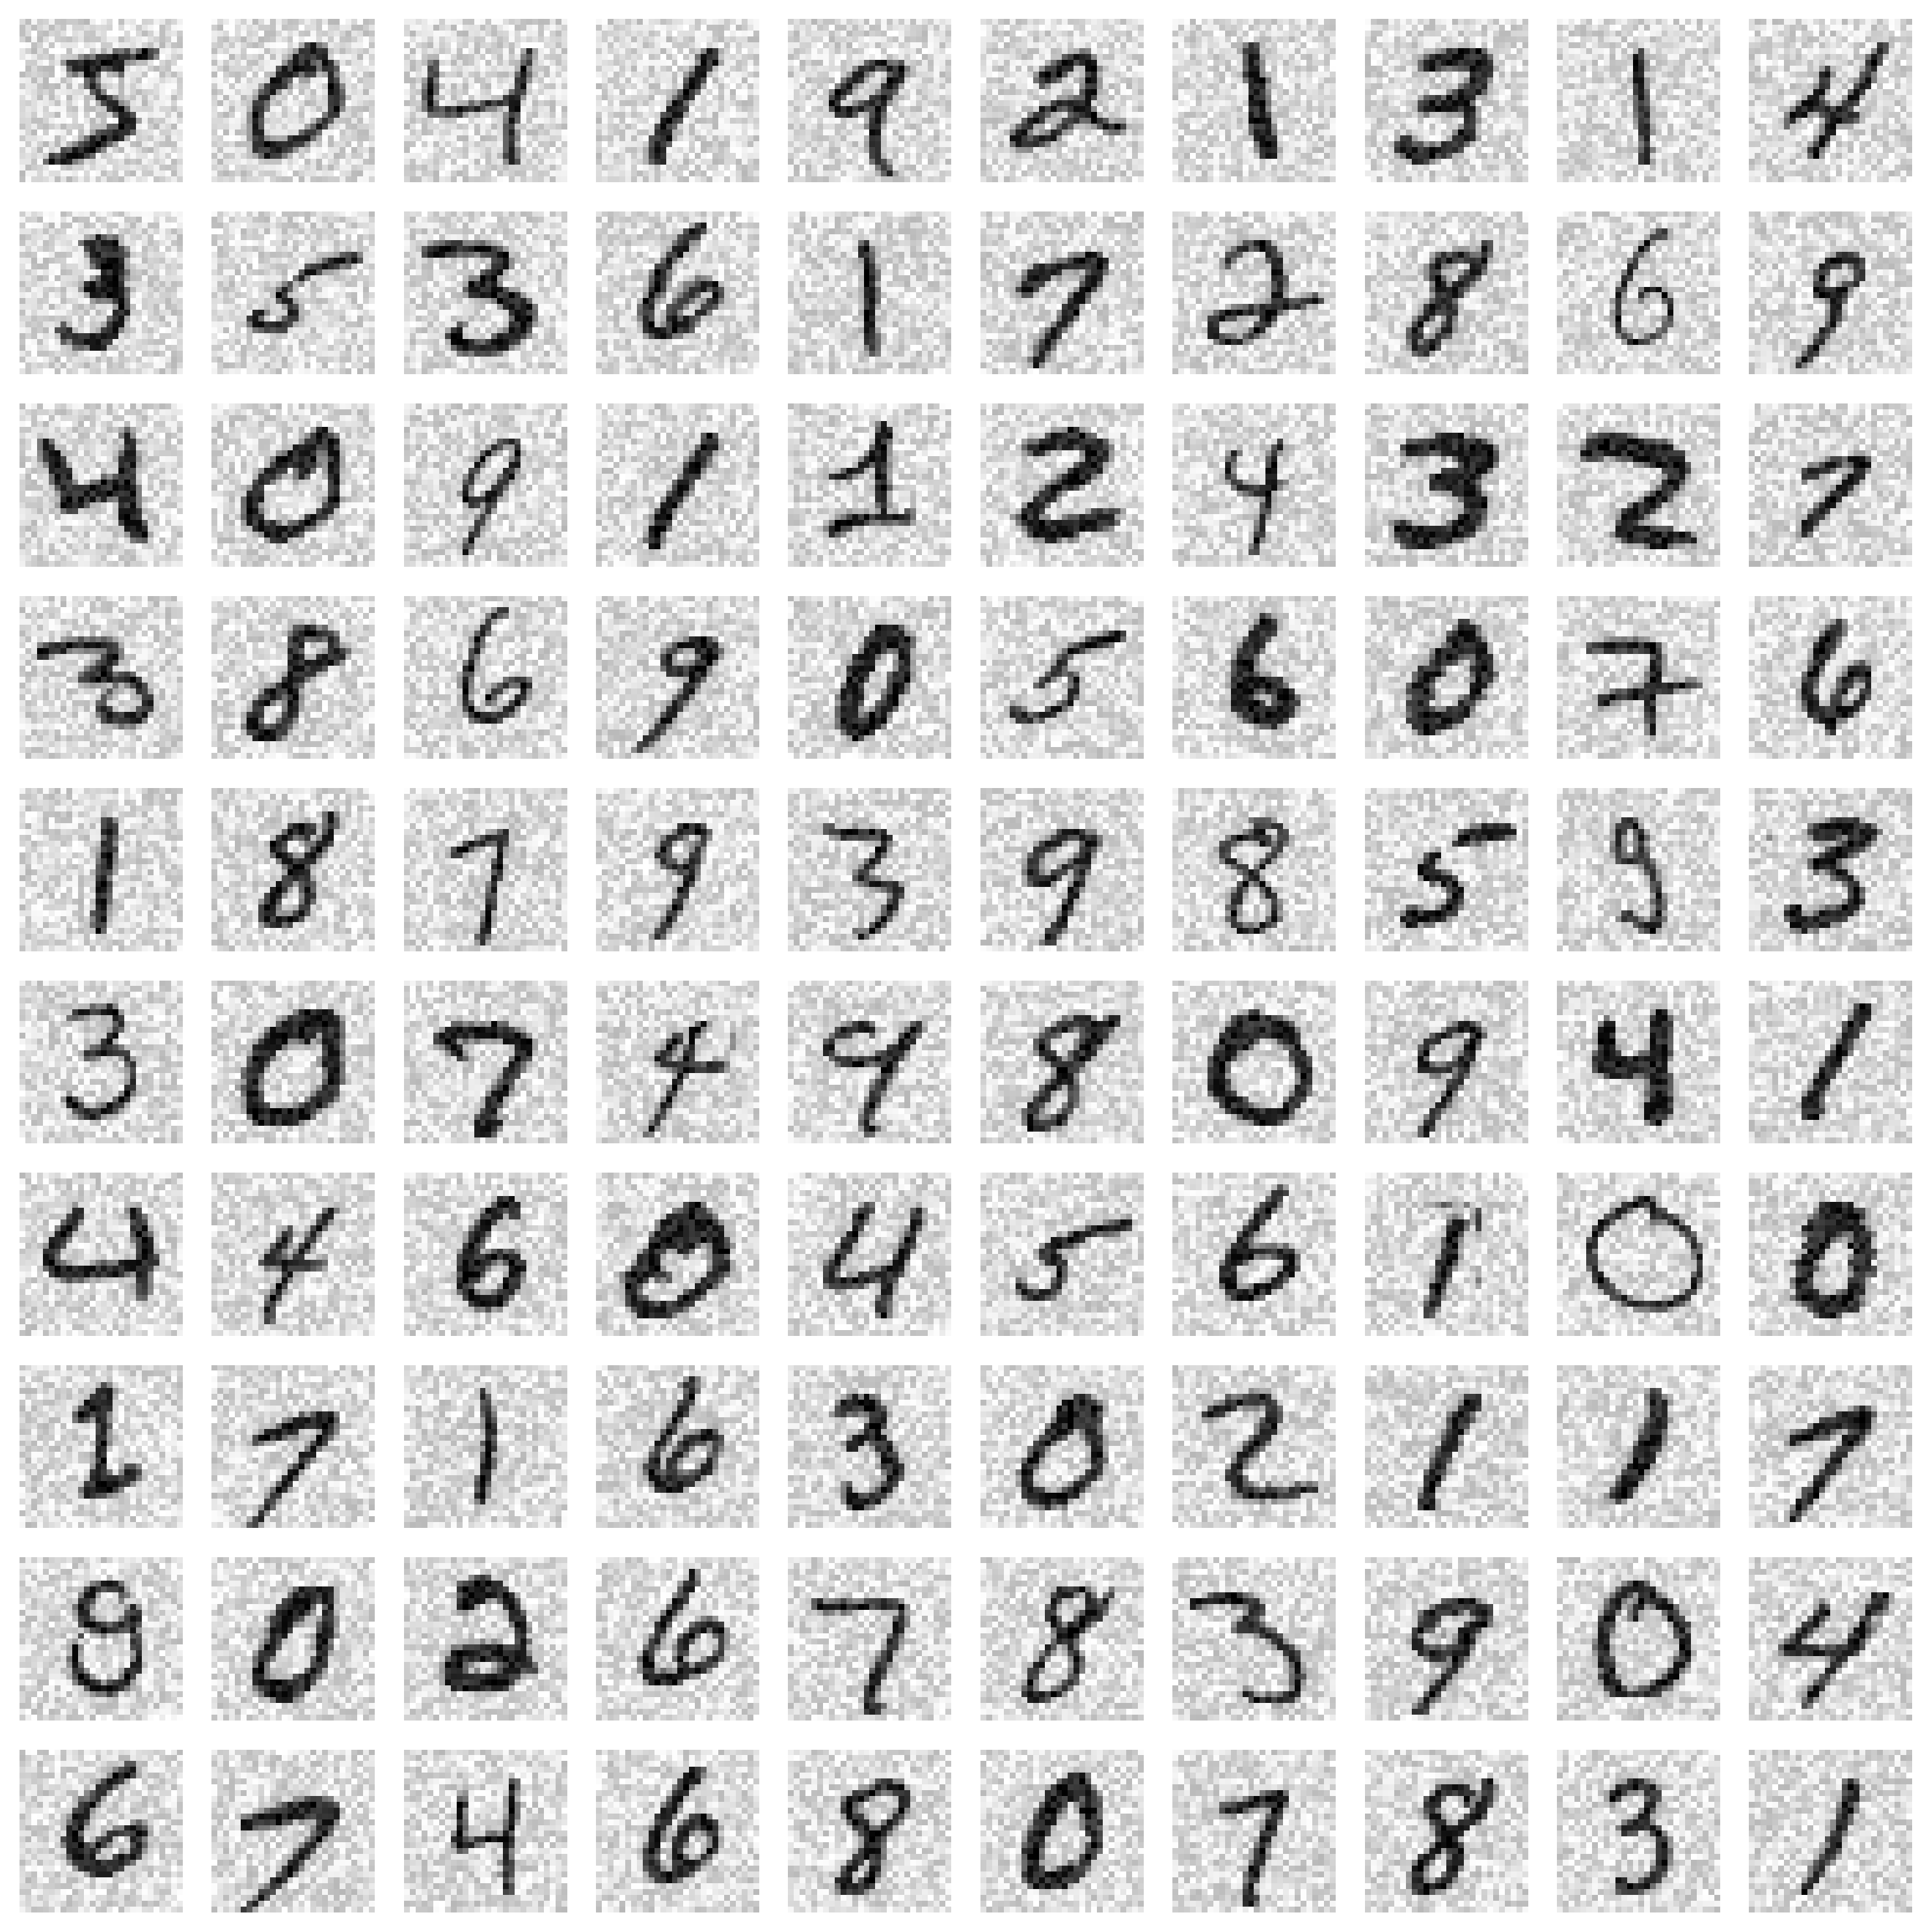

In [58]:
draw_mnist(10,10,data=X_train_noised)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_noised, y_train_noised)
clean_digits = knn_clf.predict(X_test_noised)



In [66]:
X_test_noised[0].shape

(784,)

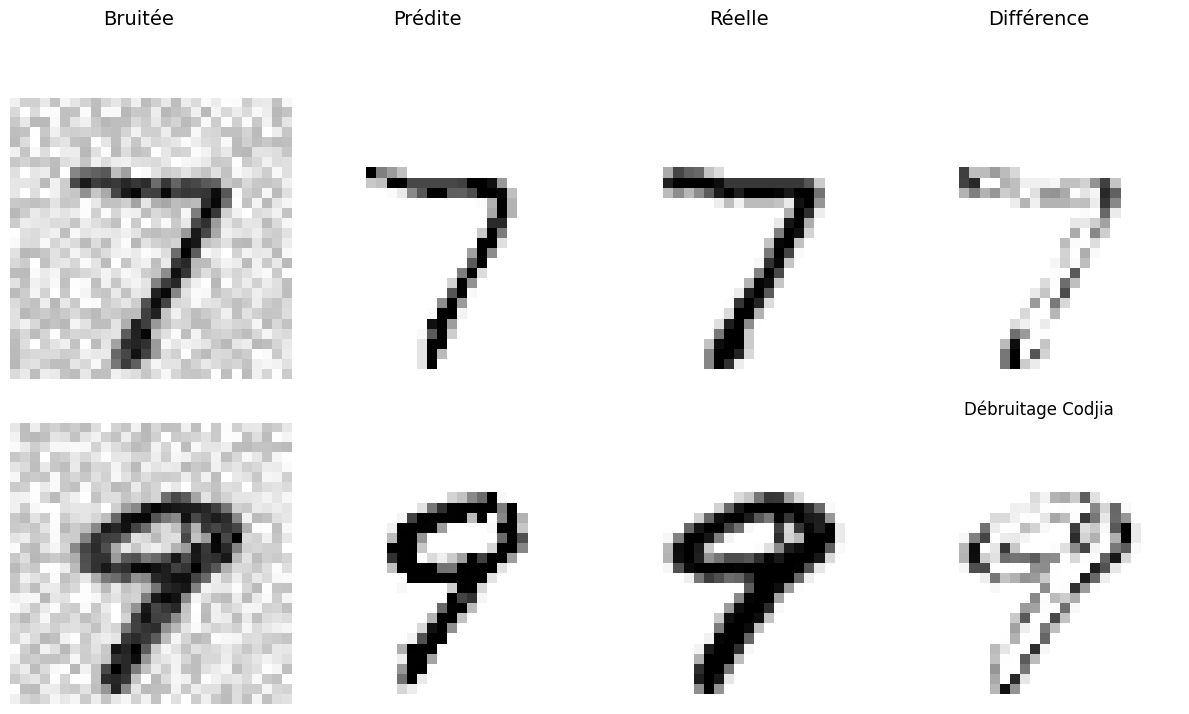

In [78]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.flatten()

images = [
    X_test_noised[0], clean_digits[0], X_test[0], np.abs(clean_digits[0] - X_test[0]),
    X_test_noised[9], clean_digits[9], X_test[9], np.abs(clean_digits[9] - X_test[9])
]

for ax, image in zip(axes, images):
    plot_digit(image, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])

# Légendes
fig.text(0.12, 0.92, 'Bruitée', ha='center', fontsize=14)
fig.text(0.36, 0.92, 'Prédite', ha='center', fontsize=14)
fig.text(0.62, 0.92, 'Réelle', ha='center', fontsize=14)
fig.text(0.87, 0.92, 'Différence', ha='center', fontsize=14)

plt.title("Débruitage Codjia")
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()